In [119]:
from IPython.display import Markdown as md

_nb_loc = "dataquest.ipynb"
_nb_title = "Objective Data Quest"

_nb_safeloc = _nb_loc.replace('/', '%2F')
md("""
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>
""".format(_nb_loc, _nb_title, _nb_safeloc))


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>


In [120]:
print("Hello World")

Hello World


In [121]:
import tensorflow as tf

print(tf.version.VERSION)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

2.13.0
GPU device not found


In [122]:
import pandas as pd

data = pd.read_csv("data/train.csv")
data.head()

,id,origin_host,origin_port,response_host,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,...,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size,traffic
0,CkwI1TlUCRApPfcJl,103.255.15.27,45314,103.255.15.23,42001,0.000090,11125.474801,NaN,22250.949602,1.00,...,0.0,0.0,NaN,0.0,89.883804,NaN,29200.0,NaN,NaN,Background
1,CBlrcc3dvtaHzyV4zj,103.255.15.27,45060,103.255.15.23,42000,0.000033,30174.848921,30174.848921,60349.697842,1.00,...,0.0,0.0,0.0,0.0,33.140182,NaN,29200.0,0.0,NaN,Background
2,CdpSX33u29yjDvnVzi,103.255.15.23,3440,52.45.16.192,443,61.977190,0.322699,0.242025,0.564724,0.75,...,NaN,0.0,NaN,0.0,401089.021138,9.861604e+06,29200.0,NaN,90.0,Background
3,CT23VJ1KsoKeCdWpx2,103.255.15.150,56132,8.8.8.8,53,0.024249,NaN,82.478178,164.956355,1.00,...,NaN,0.0,0.0,0.0,24248.838425,NaN,0.0,NaN,0.0,Benign
4,C6OJU51P50bwNKvnY6,103.255.15.150,43358,8.8.8.8,53,0.027580,NaN,NaN,72.516256,NaN,...,0.0,0.0,NaN,0.0,27580.022812,0.000000e+00,0.0,NaN,0.0,Benign


In [132]:
print(data.describe())

         origin_port  response_port  flow_duration  forward_packets_per_sec   
count  416473.000000  416473.000000  299409.000000            293081.000000  \
mean    38683.205413    5100.549457       9.661306              1843.291061   
std     18072.735011   12938.833174     105.893481              5082.812608   
min        21.000000       0.000000       0.000000                 0.000000   
25%     28646.000000      53.000000       0.000149                 3.655525   
50%     42700.000000     443.000000       0.025976                39.527141   
75%     53137.000000     443.000000       0.340028                80.680638   
max     65535.000000   65522.000000   17393.030600            223696.213333   

       backward_packets_per_sec  flow_packets_per_sec  down_up_ratio   
count             324234.000000         304723.000000  292858.000000  \
mean                1644.112145           3324.893938       0.884547   
std                 4516.829821           9299.108522       0.530388   


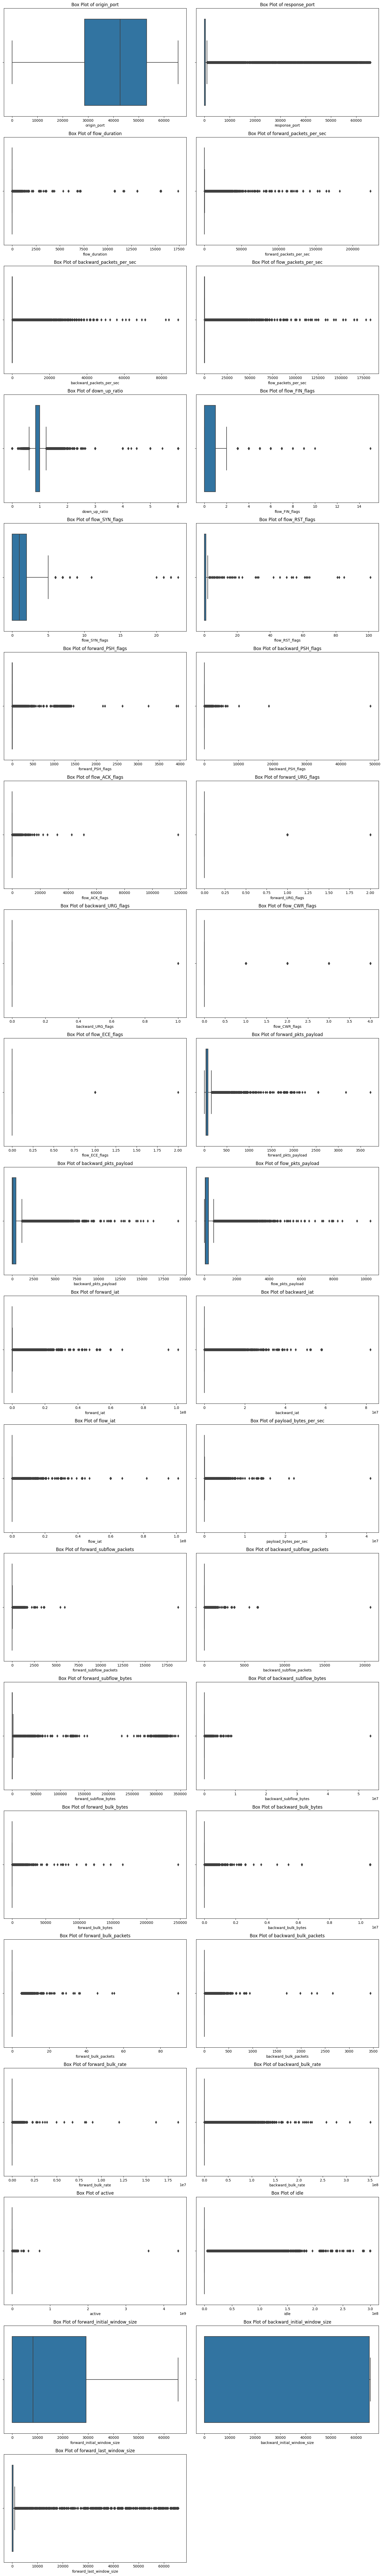

In [131]:
import matplotlib.pyplot as plt

def plot_boxplots(data):
    num_cols=2
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    num_plots = len(numerical_columns)
    num_rows = (num_plots + num_cols - 1) // num_cols 

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 7.5, num_rows * 5))
    axes = axes.flatten()  

    for i, column in enumerate(numerical_columns):
        sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')

    for j in range(len(numerical_columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_boxplots(data)

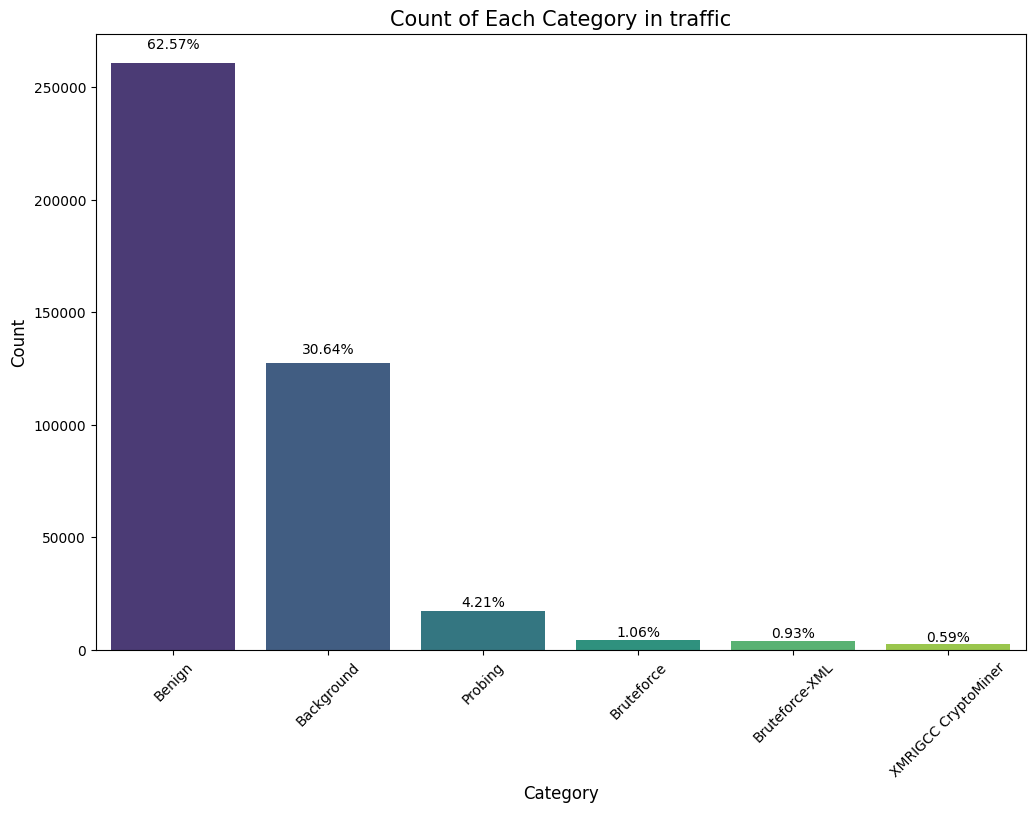

In [123]:
def plot_category_counts(data, column_name):
    
    counts = data[column_name].value_counts()
    proportions = counts / counts.sum()
    
    sorted_counts = counts.sort_values(ascending=False)
    sorted_proportions = sorted_counts / sorted_counts.sum()
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette='viridis')
    
    for bar in ax.patches:
        height = bar.get_height()
        category_name = bar.get_x() + bar.get_width() / 2
        proportion = sorted_proportions[sorted_counts.index[int(category_name)]]
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02 * height, 
                f'{proportion:.2%}', 
                ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Count of Each Category in {column_name}', fontsize=15)
    plt.xticks(rotation=45)  
    plt.show()

plot_category_counts(data, 'traffic')

In [124]:
CLASSES = 'Background', 'Benign', 'Probing', 'Bruteforce', 'XMRIGCC CryptoMiner', 'Bruteforce-XML'.split()

In [125]:
def calculate_missing_values(data):
    miss = data.isna().sum()
    miss_proportion = (miss / len(data)) * 100
    output_train = pd.DataFrame({
        'Missing Values': miss,
        'Proportion (%)': miss_proportion
    })    
    return output_train

def highlight_missing_values(val):
    if val > 30:
        color = 'background-color: red'
    elif val > 20:
        color = 'background-color: orange'
    elif val > 10:
        color = 'background-color: yellow'
    else:
        color = ''
    return color

print("Number of observations: {}".format(len(data)))
miss_data = calculate_missing_values(data)
styled_miss_data = miss_data.style.applymap(highlight_missing_values, subset=['Proportion (%)'])

styled_miss_data

Number of observations: 416473


,Missing Values,Proportion (%)
id,0,0.000000
origin_host,0,0.000000
origin_port,0,0.000000
response_host,0,0.000000
response_port,0,0.000000
flow_duration,117064,28.108425
forward_packets_per_sec,123392,29.627851
backward_packets_per_sec,92239,22.147654
flow_packets_per_sec,111750,26.832472
down_up_ratio,123615,29.681396


In [126]:
columns_to_keep = miss_data[miss_data['Proportion (%)'] < 20].index
filtered_data = data[columns_to_keep]

clean_data = filtered_data.dropna()

print(f"Number of rows after dropping missing values: {len(clean_data)}")
print(f"Number of columns after filtering: {len(clean_data.columns)}")

Number of rows after dropping missing values: 141510
Number of columns after filtering: 12


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = clean_data.drop(columns=['traffic'], axis=1)  # Features 
y = clean_data['traffic']                         # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

ValueError: could not convert string to float: 'CAgrGf4tV4JN3lEqn3'

In [97]:
import numpy as np
import seaborn as sns

def display_confusion_matrix(cmat, score, f1):
    plt.figure(figsize=(12, 10))  
    ax = plt.gca()
    
    sns.heatmap(cmat, annot=True, fmt='.2f', cmap='Reds', ax=ax, 
                xticklabels=CLASSES, yticklabels=CLASSES,
                cbar=True, cbar_kws={'shrink': 0.8}, annot_kws={"size": 10})
    
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=15)
    
    titlestring = ""
    if score is not None:
        titlestring += 'Balanced Accuracy = {:.3f} '.format(score)
    if f1 is not None:
        titlestring += '\nF1-Score = {:.3f} '.format(f1)
    if len(titlestring) > 0:
        plt.figtext(0.8, 1, titlestring, 
                    horizontalalignment='right', verticalalignment='bottom', 
                    fontsize=12, color='#804040', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
    
    plt.tight_layout()  
    plt.show()

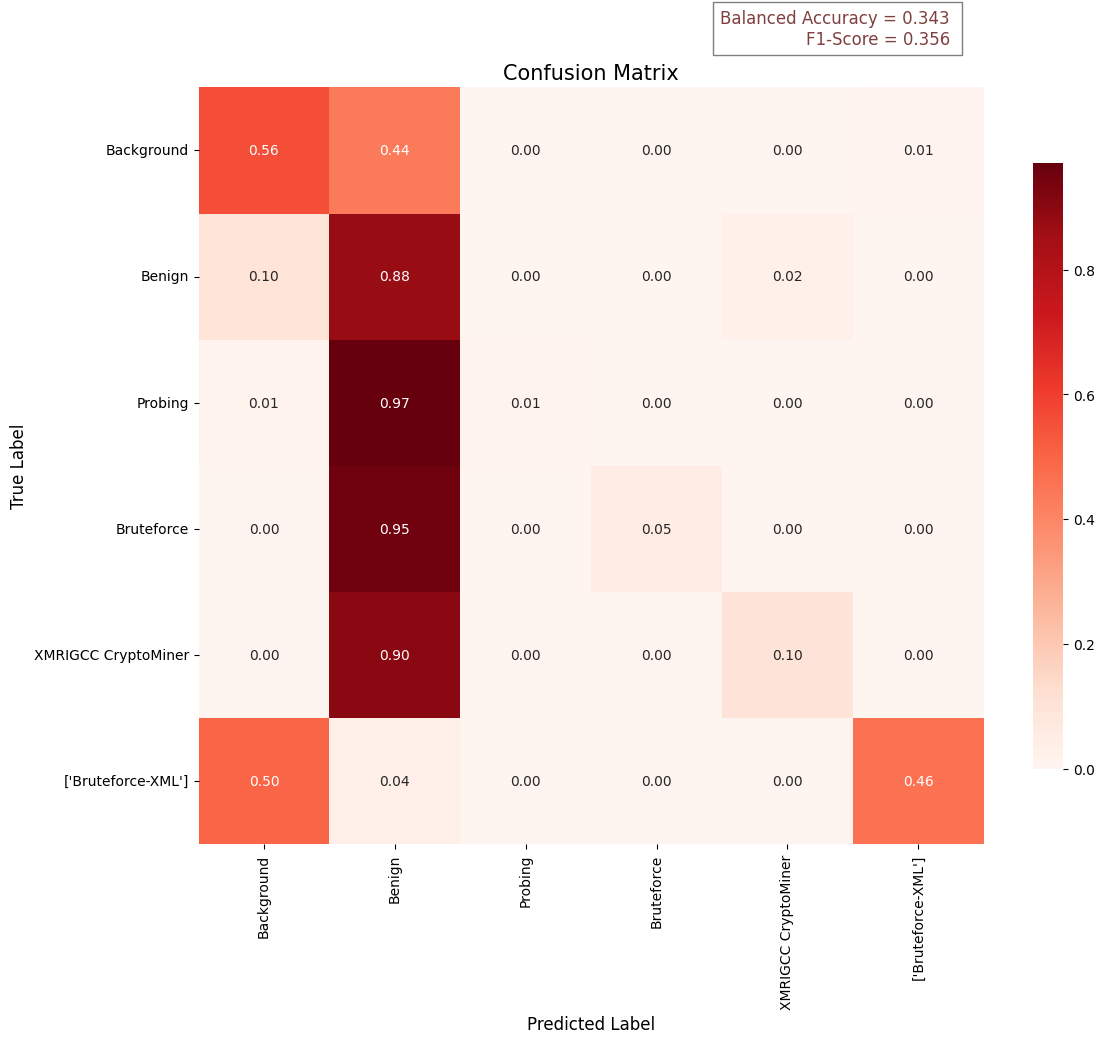

f1 score: 0.356, balanced_accuracy: 0.343


In [98]:
from sklearn.metrics import f1_score, confusion_matrix, balanced_accuracy_score

score = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
cmat = confusion_matrix(y_test, y_pred)
cmat = cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis]
display_confusion_matrix(cmat, score, f1)